In [ ]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib. pyplot as plt
import numpy as np

In [ ]:
(x_train, y_train) ,(x_test, y_test)= datasets.cifar10.load_data()

In [ ]:
print(x_train.shape)
print(x_test.shape)

(50000, 32, 32, 3)
(10000, 32, 32, 3)


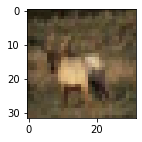

In [ ]:
plt.figure(figsize=(15,2))
plt.imshow(x_train[3])

In [ ]:
y_train.ndim

2

In [ ]:
y_train = y_train.reshape(-1,)
y_test = y_test.reshape(-1,)

In [ ]:
classes = ["airplane","automobile","bird","cat","deer","dog","frog","hourse","ship","truck"]

In [ ]:
def plot_sample(X, y, index):
    plt.figure(figsize=(15,2))
    plt.imshow(X[index])
    plt.xlabel(classes[y[index]])

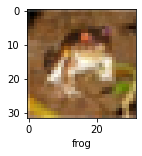

In [ ]:
plot_sample(x_train,y_train,0)

In [ ]:
x_train = x_train / 255
x_test = x_test / 255
x_test[0]

array([[[0.61960784, 0.43921569, 0.19215686],
        [0.62352941, 0.43529412, 0.18431373],
        [0.64705882, 0.45490196, 0.2       ],
        ...,
        [0.5372549 , 0.37254902, 0.14117647],
        [0.49411765, 0.35686275, 0.14117647],
        [0.45490196, 0.33333333, 0.12941176]],

       [[0.59607843, 0.43921569, 0.2       ],
        [0.59215686, 0.43137255, 0.15686275],
        [0.62352941, 0.44705882, 0.17647059],
        ...,
        [0.53333333, 0.37254902, 0.12156863],
        [0.49019608, 0.35686275, 0.1254902 ],
        [0.46666667, 0.34509804, 0.13333333]],

       [[0.59215686, 0.43137255, 0.18431373],
        [0.59215686, 0.42745098, 0.12941176],
        [0.61960784, 0.43529412, 0.14117647],
        ...,
        [0.54509804, 0.38431373, 0.13333333],
        [0.50980392, 0.37254902, 0.13333333],
        [0.47058824, 0.34901961, 0.12941176]],

       ...,

       [[0.26666667, 0.48627451, 0.69411765],
        [0.16470588, 0.39215686, 0.58039216],
        [0.12156863, 0

In [ ]:
ANN = models.Sequential([
    layers.Flatten(input_shape = (32,32,3)),
    layers.Dense(3000,activation='relu'),
    layers.Dense(1000, activation = 'relu'),
    layers.Dense(10,activation="softmax")
])

In [ ]:
ANN.compile(optimizer="SGD",
           loss = "sparse_categorical_crossentropy",
           metrics=["accuracy","mse"])

In [ ]:
ANN.fit(x_train,y_train,epochs=5)

Epoch 1/5


2022-08-01 13:17:25.916686: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


1563/1563 [==============================] - 18s 11ms/step - loss: 1.8089 - accuracy: 0.3580 - mse: 27.6212
Epoch 2/5
1563/1563 [==============================] - 17s 11ms/step - loss: 1.6209 - accuracy: 0.4283 - mse: 27.6267
Epoch 3/5
1563/1563 [==============================] - 17s 11ms/step - loss: 1.5437 - accuracy: 0.4581 - mse: 27.6294
Epoch 4/5
1563/1563 [==============================] - 19s 12ms/step - loss: 1.4814 - accuracy: 0.4802 - mse: 27.6315
Epoch 5/5
1563/1563 [==============================] - 18s 12ms/step - loss: 1.4343 - accuracy: 0.4959 - mse: 27.6331


In [ ]:
ANN.evaluate(x_test,y_test)

  6/313 [..............................] - ETA: 3s - loss: 1.4948 - accuracy: 0.4792 - mse: 30.1946 

2022-08-01 13:19:49.854994: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


313/313 [==============================] - 3s 8ms/step - loss: 1.5265 - accuracy: 0.4634 - mse: 27.6315


[1.5265042781829834, 0.4634000360965729, 27.631467819213867]

In [ ]:
from sklearn.metrics import confusion_matrix , classification_report
y_pred = ANN.predict(x_test)

2022-08-01 13:19:56.319682: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


In [ ]:
y_pred[1].sum()

0.99999994

In [ ]:
y_pred_class = [np.argmax(element) for element in y_pred]
print([y_test[:5]])
print(y_pred_class[:5])

[array([3, 8, 8, 0, 6], dtype=uint8)]
[3, 1, 0, 0, 4]


In [ ]:
 print(classification_report(y_test,y_pred_class))

              precision    recall  f1-score   support

           0       0.66      0.61      0.64      1000
           1       0.62      0.73      0.67      1000
           2       0.69      0.16      0.26      1000
           3       0.29      0.62      0.39      1000
           4       0.46      0.52      0.49      1000
           5       0.40      0.46      0.42      1000
           6       0.63      0.50      0.55      1000
           7       0.68      0.56      0.61      1000
           8       0.78      0.55      0.65      1000
           9       0.60      0.55      0.58      1000

    accuracy                           0.53     10000
   macro avg       0.58      0.53      0.53     10000
weighted avg       0.58      0.53      0.53     10000



In [ ]:
CNN = models.Sequential([
    layers.Conv2D(filters=32,kernel_size=(3,3),activation='relu',input_shape = (32,32,3)),
    layers.MaxPool2D(2,2),

    layers.Conv2D(filters=64,kernel_size=(3,3),activation='relu',input_shape = (32,32,3)),
    layers.MaxPool2D(2,2),

    layers.Flatten(),
    layers.Dense(64,activation='relu'),
    layers.Dense(10,activation='softmax')
])

In [ ]:
CNN.compile(optimizer="adam",
           loss = "sparse_categorical_crossentropy",
           metrics=["accuracy","mse"])

In [ ]:
CNN.fit(x_train,y_train,epochs=10)

Epoch 1/10


2022-08-01 14:11:32.521800: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


1563/1563 [==============================] - 17s 10ms/step - loss: 1.4385 - accuracy: 0.4851 - mse: 27.6333
Epoch 2/10
1563/1563 [==============================] - 14s 9ms/step - loss: 1.0744 - accuracy: 0.6233 - mse: 27.6480
Epoch 3/10
1563/1563 [==============================] - 14s 9ms/step - loss: 0.9450 - accuracy: 0.6710 - mse: 27.6540
Epoch 4/10
1563/1563 [==============================] - 14s 9ms/step - loss: 0.8617 - accuracy: 0.7018 - mse: 27.6576
Epoch 5/10
1563/1563 [==============================] - 15s 9ms/step - loss: 0.7918 - accuracy: 0.7263 - mse: 27.6608
Epoch 6/10
1563/1563 [==============================] - 15s 9ms/step - loss: 0.7330 - accuracy: 0.7454 - mse: 27.6635
Epoch 7/10
1563/1563 [==============================] - 15s 9ms/step - loss: 0.6770 - accuracy: 0.7658 - mse: 27.6660
Epoch 8/10
1563/1563 [==============================] - 15s 10ms/step - loss: 0.6340 - accuracy: 0.7803 - mse: 27.6679
Epoch 9/10
1563/1563 [==============================] - 15s 10ms/

In [ ]:
CNN.evaluate(x_test,y_test)

  7/313 [..............................] - ETA: 2s - loss: 0.9044 - accuracy: 0.7277 - mse: 31.1866 

2022-08-01 14:14:22.386097: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


313/313 [==============================] - 2s 6ms/step - loss: 0.9352 - accuracy: 0.7050 - mse: 27.6693


[0.935163140296936, 0.7050000429153442, 27.66925048828125]

In [ ]:
# The model accuracy on the train data is 80 % with 27.67 MSE, and the accuracy on test data is 70 %.
# Hence, we consider that the model is overfitting.

In [ ]:
y_pred_cnn = CNN.predict(x_test)

2022-08-01 14:17:01.579090: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


In [ ]:
y_pred_class_cnn = [np.argmax(element) for element in y_pred_cnn]

[3, 8, 1, 0, 4]

In [ ]:
print(y_test[:5])
print(y_pred_class_cnn[:5])

[3 8 8 0 6]
[3, 8, 1, 0, 4]


In [ ]:
print("Classification report for ANN \n")
print(classification_report(y_test,y_pred_class))
print("Classification report for CNN \n")
print(classification_report(y_test,y_pred_class_cnn))

Classification report for ANN 

              precision    recall  f1-score   support

           0       0.66      0.61      0.64      1000
           1       0.62      0.73      0.67      1000
           2       0.69      0.16      0.26      1000
           3       0.29      0.62      0.39      1000
           4       0.46      0.52      0.49      1000
           5       0.40      0.46      0.42      1000
           6       0.63      0.50      0.55      1000
           7       0.68      0.56      0.61      1000
           8       0.78      0.55      0.65      1000
           9       0.60      0.55      0.58      1000

    accuracy                           0.53     10000
   macro avg       0.58      0.53      0.53     10000
weighted avg       0.58      0.53      0.53     10000

Classification report for CNN 

              precision    recall  f1-score   support

           0       0.67      0.79      0.73      1000
           1       0.78      0.87      0.82      1000
           2  

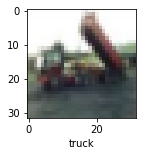

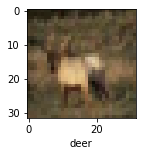

In [ ]:
plot_sample(x_train,y_train,2)
plot_sample(x_train,y_train,3)


In [ ]:
# The recall for class 2(truck) in ANN is low, and the recall for class 3 (deer) in CNN is low.